In [2]:
from sklearn.datasets import fetch_openml

from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC


from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score,recall_score,precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = fetch_openml("mnist_784",as_frame = False)

X,y = mnist.data,mnist.target

In [4]:
print(X.shape,y.shape)

(70000, 784) (70000,)


In [5]:
def plot_dig(digit):
    image = digit.reshape(28,28)
    plt.imshow(image)
    

'4'

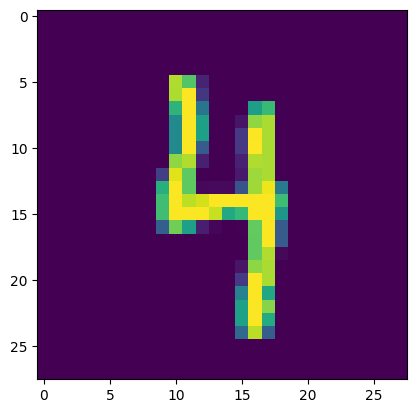

In [6]:
plot_dig(X[1110])
y[1110]


In [7]:
x_train,x_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [8]:
test_5 = (y_train == "5")

print(test_5.shape, x_train.shape)

(60000,) (60000, 784)


In [9]:
sgd_model = SGDClassifier(random_state=42)

In [10]:
sgd_model.fit(x_train,test_5)

SGDClassifier(random_state=42)

In [11]:
sgd_model.predict([X[80]])


array([False])

In [12]:
cross_val_score(sgd_model,x_train,test_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
# dummy_model = DummyClassifier()
# dummy_model.fit(x_train,y_train)

In [14]:
cross_val_score(sgd_model,x_train,test_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [15]:
# cross_val_score(dummy_model,x_train,test_5,cv=3,scoring="accuracy")

In [16]:
pred = cross_val_predict(sgd_model,x_train,test_5,cv=3)
pred

array([ True, False, False, ...,  True, False, False])

In [17]:
con_matrix = confusion_matrix(pred,test_5)
con_matrix

array([[53892,  1891],
       [  687,  3530]], dtype=int64)

In [18]:
print(precision_score(test_5,pred),recall_score(test_5,pred))

0.8370879772350012 0.6511713705958311


In [19]:
x = sgd_model.decision_function([X[1]])
x

array([-5897.37359354])

In [20]:
threshold = 10000
x1 = (x>threshold)
x1

array([False])

In [21]:
x = cross_val_predict(sgd_model,x_train,test_5,cv=3,method="decision_function")
x

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [22]:
precision,recall,threshold = precision_recall_curve(test_5,x)

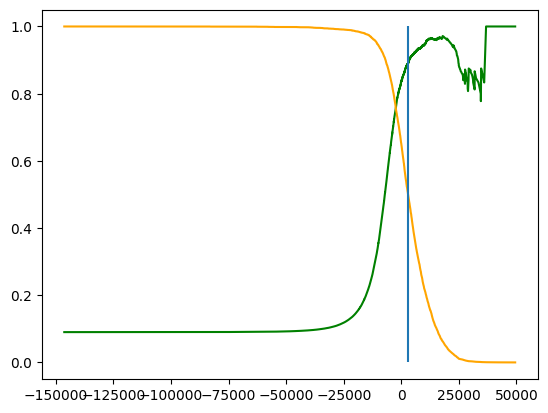

In [23]:
plt.plot(threshold,precision[:-1],label="precision",color="green")
plt.plot(threshold,recall[:-1],label="recall",color="orange")
plt.vlines(3000,0,1.0)
plt.show()

In [24]:
final_threshold = threshold[(precision >= 0.9).argmax()]
print(final_threshold)
# a = np.array([1,2,3,4,5,6,7,8,9])
# print((a>=2).argmax())

3370.0194991439557


In [25]:
precision_score(test_5,(x >= final_threshold))

0.9000345901072293

In [26]:
rnd_model = RandomForestClassifier(random_state=42)

In [27]:
rnd_model_pred = cross_val_predict(rnd_model,x_train,test_5,cv=3,method="predict_proba")

In [28]:
rnd_model_pred[:10]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [29]:
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [30]:
precision_rnd,recall_rnd,threshold_rnd = precision_recall_curve(test_5,rnd_model_pred[:,1])

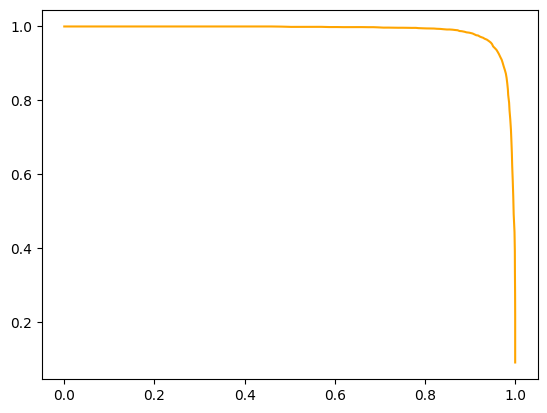

In [31]:
plt.plot(recall_rnd,precision_rnd,color="orange",label="random forest")
plt.show()

In [32]:
svc_model = SVC(random_state=42)
svc_model.fit(x_train[:1000],y_train[:1000])

SVC(random_state=42)

In [33]:
svc_model.predict([X[6000]])


array(['6'], dtype=object)

In [34]:
svc_desc = svc_model.decision_function([x_train[0]])
svc_desc

array([[ 1.75828215,  2.74956232,  6.13809559,  8.2853702 , -0.28728967,
         9.30119996,  0.74228825,  3.79256174,  7.20847395,  4.85762716]])

In [38]:
svc_pred = cross_val_predict(svc_model,x_train_std[:1000],y_train[:1000],cv=3)

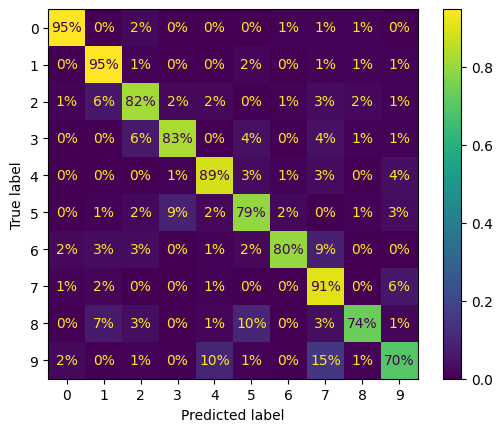

In [47]:
ConfusionMatrixDisplay.from_predictions(y_train[:1000],svc_pred,normalize="true",values_format=".0%")
plt.show()